In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from io import StringIO


In [2]:
!python --version

Python 3.7.3


In [3]:

csv_cases_url = "https://coronavirus.data.gov.uk/downloads/csv/coronavirus-cases_latest.csv"
csv_deaths_url = "https://coronavirus.data.gov.uk/downloads/csv/coronavirus-deaths_latest.csv"


req_cases = requests.get(csv_cases_url)
cases_url_content  = StringIO(req_cases.text)
data_cases = pd.read_csv(cases_url_content)

req_deaths = requests.get(csv_deaths_url)
deaths_url_content  = StringIO(req_deaths.text)
data_deaths = pd.read_csv(deaths_url_content)




In [16]:
mer = data_cases[data_cases['Area name'] == 'Merton']

In [5]:
wan = data_cases[data_cases['Area name'] == 'Wandsworth']

In [6]:
cam = data_cases[data_cases['Area name'] == 'Camden']

In [13]:
cases = mer["Daily lab-confirmed cases"]
dates = mer["Specimen date"]
casesw = wan["Daily lab-confirmed cases"]
datesw = wan["Specimen date"]
casesc = cam["Daily lab-confirmed cases"]
datesc = cam["Specimen date"]


28379    0
28380    0
28381    0
28382    1
28383    1
Name: Daily lab-confirmed cases, dtype: int64

In [8]:
dcases = cases[:]
ddates = dates[:]
dcasesw = casesw[:]
ddatesw = datesw[:]
dcasesc = casesc[:]
ddatesc = datesc[:]

dncases = dcases.to_numpy()
dncasesw = dcasesw.to_numpy()
dncasesc = dcasesc.to_numpy()


print(f"number of cases: {len(dncases)}")

#seven days average function
def seven_day_avg(array):
    weights = np.ones(7)/7
    return np.convolve(array, weights, mode='valid')


ncases_avg = seven_day_avg(dncases)
ncasesw_avg = seven_day_avg(dncasesw)
ncasesc_avg = seven_day_avg(dncasesc)




print(f"ncases_avg length: {len(ncases_avg)}")

nddates = ddates.to_numpy()
nddatesw = ddatesw.to_numpy()
nddatesc = ddatesc.to_numpy()



number of cases: 370
ncases_avg length: 364


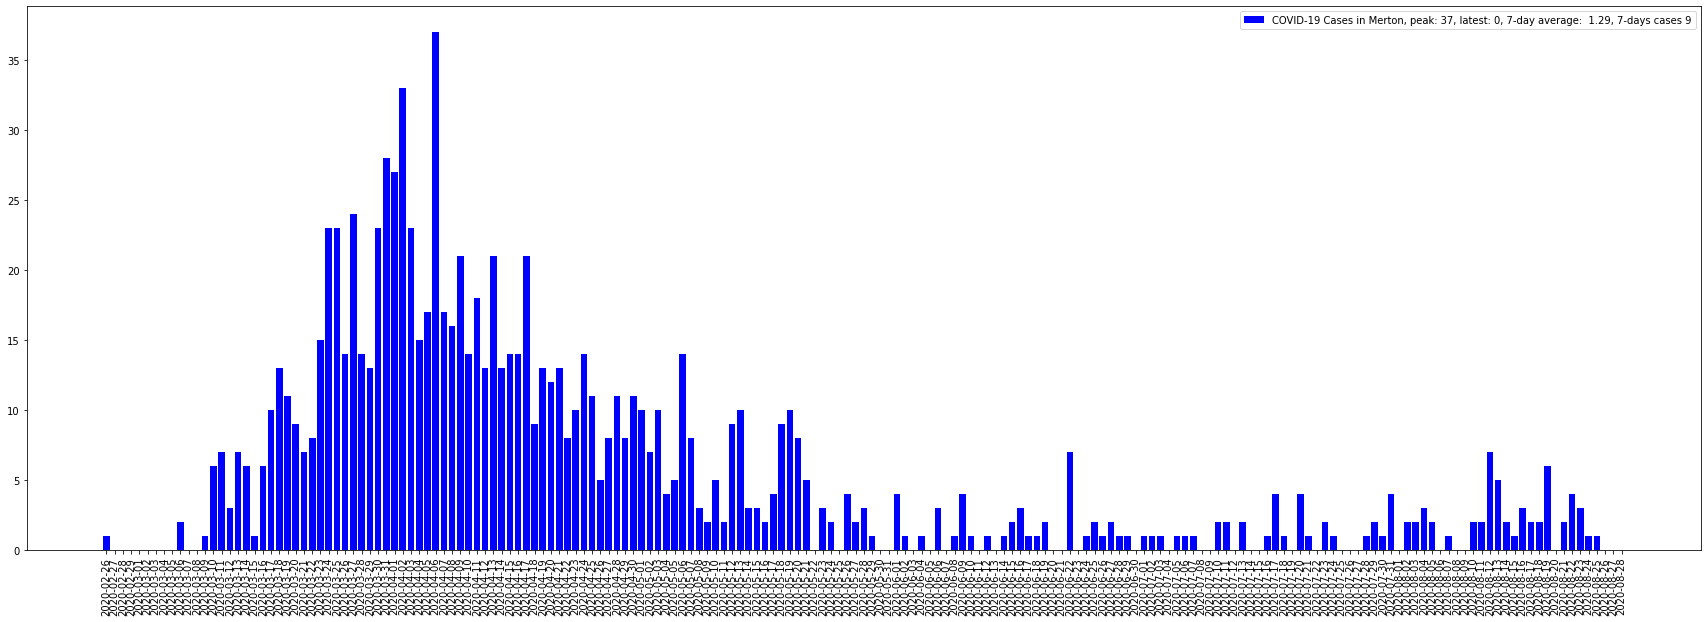

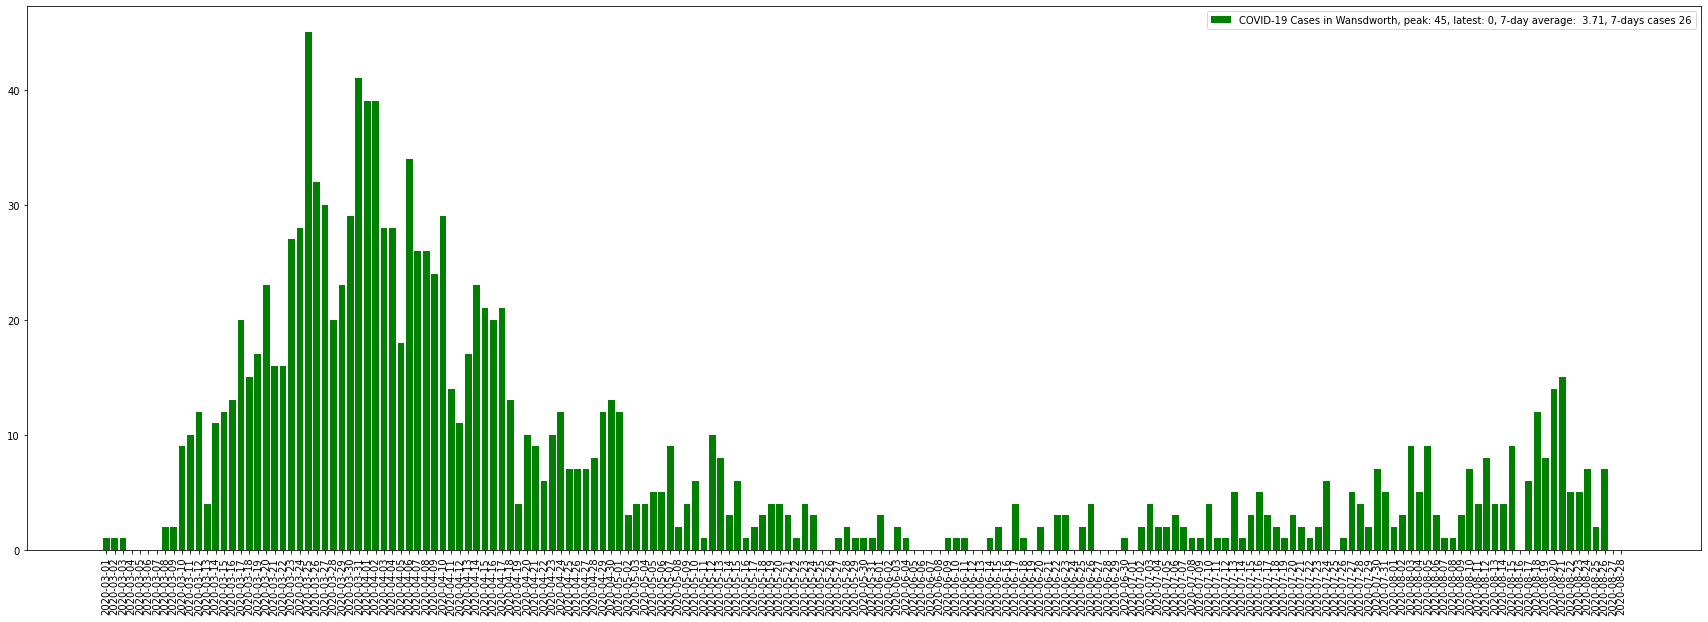

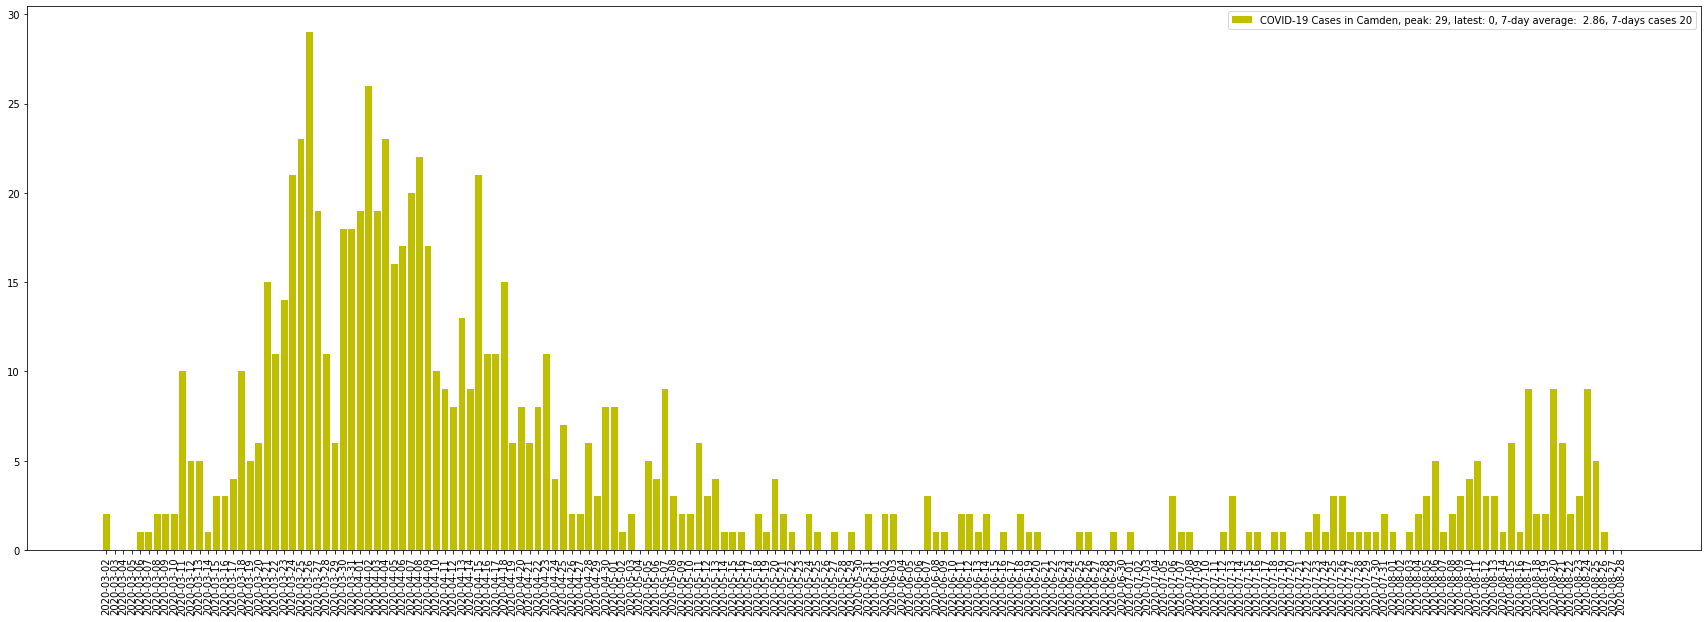

In [17]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
plt.bar(ddates, dcases, label=f"COVID-19 Cases in Merton, peak: {int(np.max(dncases))}, latest: {int(dncases[0])}, 7-day average: {ncases_avg[0]: .2f}, 7-days cases {sum(dncases[0:7])}", color = 'b')
plt.gca().invert_xaxis()
plt.legend()
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
plt.bar(ddatesw, dcasesw, label=f"COVID-19 Cases in Wansdworth, peak: {int(np.max(dncasesw))}, latest: {int(dncasesw[0])}, 7-day average: {ncasesw_avg[0]: .2f}, 7-days cases {sum(dncasesw[0:7])}", color = 'g')
#plt.plot(nddatesw[3:len(nddatesw)-3], ncasesw_avg, color='r', linewidth = 3.0, label="7-day rolling average")
plt.gca().invert_xaxis()
plt.legend()
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
plt.bar(ddatesc, dcasesc, label=f"COVID-19 Cases in Camden, peak: {int(np.max(dncasesc))}, latest: {int(dncasesc[0])}, 7-day average: {ncasesc_avg[0]: .2f}, 7-days cases {sum(dncasesc[0:7])}", color='y')
#plt.plot(nddatesc[3:len(nddatesc)-3], ncasesc_avg, color='r', linewidth = 3.0, label="7-day rolling average")
plt.gca().invert_xaxis()
plt.legend()

In [10]:
duk = data_deaths[data_deaths['Area name'] == 'United Kingdom']
deng = data_deaths[data_deaths['Area name'] == 'England']
dwales = data_deaths[data_deaths['Area name'] == 'Wales']
dscot = data_deaths[data_deaths['Area name'] == 'Scotland']
dni = data_deaths[data_deaths['Area name'] == 'Northern Ireland']

KeyError: 'Area name'

In [ ]:
deathsuk = duk["Daily change in deaths"]
datesuk = duk["Reporting date"]
ndeathsuk = deathsuk.to_numpy()
ndatesuk = datesuk.to_numpy()
ndeathsuk_avg = seven_day_avg(ndeathsuk)


In [ ]:
plt.figure(figsize=(25,10))
plt.xticks(rotation=90)
deathsbar = plt.bar(datesuk, deathsuk, label='COVID-19 Deaths in the UK, peak: {}, latest: {}'.format(int(np.max(ndeathsuk)), int(ndeathsuk[0])), color='black')
plt.plot(ndatesuk[3:len(ndatesuk)-3], ndeathsuk_avg, color='r', linewidth = 3.0, label="7-day rolling average")
axes = plt.axis()
plt.gca().invert_xaxis()
plt.legend()


In [ ]:
deathseng = deng["Daily change in deaths"]
dateseng = deng["Reporting date"]
ndeathseng = deathseng.to_numpy()
ndateseng = dateseng.to_numpy()
ndeathseng_avg = seven_day_avg(ndeathseng)


plt.figure(figsize=(25,10))
plt.xticks(rotation=90)
deathsbar = plt.bar(dateseng, deathseng, label='COVID-19 Deaths in England, latest: {}'.format(int(ndeathseng[0])), color='indigo')
plt.plot(ndateseng[3:len(ndateseng)-3], ndeathseng_avg, color='r', linewidth = 3.0, label="7-day average curve")
axes = plt.axis()
plt.gca().invert_xaxis()
plt.legend()

In [ ]:
deathswales = dwales["Daily change in deaths"]
dateswales = dwales["Reporting date"]
ndeathswales = deathswales.to_numpy()
ndateswales = dateswales.to_numpy()
ndeathswales_avg = seven_day_avg(ndeathswales)


plt.figure(figsize=(25,10))
plt.xticks(rotation=90)
deathsbar = plt.bar(dateswales, deathswales, label='COVID-19 Deaths in Wales, latest {}'.format(int(ndeathswales[0])), color='darkorange')
plt.plot(ndateswales[3:len(ndateswales)-3], ndeathswales_avg, color='r', linewidth = 3.0, label="7-day average curve")
axes = plt.axis()
plt.gca().invert_xaxis()
plt.legend()

In [ ]:
deathsscot = dscot["Daily change in deaths"]
datesscot = dscot["Reporting date"]
ndeathsscot = deathsscot.to_numpy()
ndatesscot = datesscot.to_numpy()
ndeathsscot_avg = seven_day_avg(ndeathsscot)

plt.figure(figsize=(25,10))
plt.xticks(rotation=90)
deathsbar = plt.bar(datesscot, deathsscot, label='COVID-19 Deaths in Scotland, latest {}'.format(int(ndeathsscot[0])), color='midnightblue')
plt.plot(ndatesscot[3:len(ndatesscot)-3], ndeathsscot_avg, color='r', linewidth = 3.0, label="7-day average curve")
axes = plt.axis()
plt.gca().invert_xaxis()
plt.legend()

In [ ]:
deathsni = dni["Daily change in deaths"]
datesni = dni["Reporting date"]
ndeathsni = deathsni.to_numpy()
ndatesni = datesni.to_numpy()
ndeathsni_avg = seven_day_avg(ndeathsni)

#print(f'max {np.max(ndeathsscot)}')

plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
deathsbar = plt.bar(datesni, deathsni, label='COVID-19 Deaths in Northern Ireland, latest {}'.format(int(ndeathsni[0])), color='darkgreen')
plt.plot(ndatesni[3:len(ndatesni)-3], ndeathsni_avg, color='r', linewidth = 3.0, label="7-day average curve")
axes = plt.axis()
plt.gca().invert_xaxis()
plt.legend()